# Customer Personality Analysis


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment. 

## References
- [Customer Personality Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

In [77]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

## 1. Exploratory Data Analysis

In [152]:
# Load the data
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

# Display basic information
print('Dataframe info: \n',df.info())
print('Dataframe summary statistics: \n',df.describe())

# Check for missing values
print('Dataframe null values: \n',df.isnull().sum())

# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Column Description

- People
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years

- Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s website in the last month

## Clean Data

### Outliers and missing data

- There is one Income with a value of 666666 and it's greater than the mean(52247).
- There is one Year_Birth with a value of 1893 and it's greater than the mean(1968).

In [153]:
# Drop rows with missing values
df = df.dropna()

# remove outliers
df = df[df['Income'] < 666666]
df = df[df['Year_Birth'] > 1900]

## Feature Selection

- The following features are not necessary for our analysis:
    - 'ID'
    - 'Dt_Customer'
    - 'Z_CostContact'
    - 'Z_Revenue'
    - 'Complain'
    - 'Response'
    - 'Recency'
- Map Marital_Status column
- Map Education column
- Map Children column
- Create a new column TotalAcceptedCmp

In [154]:
# Drop irrelevant columns
# ID -> random value
# Z_CostContact, Z_Revenue -> constant value
# Dt_Customer -> not relevant to problem
df = df.drop(['ID','Dt_Customer','Z_CostContact','Z_Revenue','Complain','Response','Recency'], axis=1)

# Map the numerical values to categorical labels
df['Marital_Status'] = df['Marital_Status'].map({'Alone':0,'Divorced':0,'Single':0,'Widow':0,'YOLO':0, 'Married':1,'Together':1})

# Map education levels to binary values
df['Education'] = df['Education'].map({'Basic': 0, 'Graduation': 1, 'Master': 1, 'PhD': 1})

df['Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df = df.drop(['Kidhome','Teenhome'], axis=1)

# Create a new column 'TotalAcceptedCmp' by summing up the individual campaign columns
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Drop the original campaign columns if no longer needed
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Convert categorical columns to numerical (e.g., Education, Marital_Status)
df = pd.get_dummies(df, drop_first=True)

# Check for duplicates
df = df.drop_duplicates()

df.reset_index(inplace=True, drop=True)

print('Dataframe summary statistics: \n',df.describe())

Dataframe summary statistics: 
         Year_Birth    Education  Marital_Status         Income     MntWines  \
count  1825.000000  1825.000000     1825.000000    1825.000000  1825.000000   
mean   1968.429589     0.973151        0.640548   52513.021918   315.092603   
std      11.625252     0.161687        0.479971   21513.422145   341.367109   
min    1940.000000     0.000000        0.000000    1730.000000     0.000000   
25%    1959.000000     1.000000        0.000000   36065.000000    27.000000   
50%    1970.000000     1.000000        1.000000   52190.000000   185.000000   
75%    1977.000000     1.000000        1.000000   69084.000000   517.000000   
max    1996.000000     1.000000        1.000000  162397.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  1825.000000      1825.000000      1825.000000       1825.000000   
mean     26.070685       171.418082        36.628493         26.462466   
std      39.873621       229.39488

### Distribution and correlations

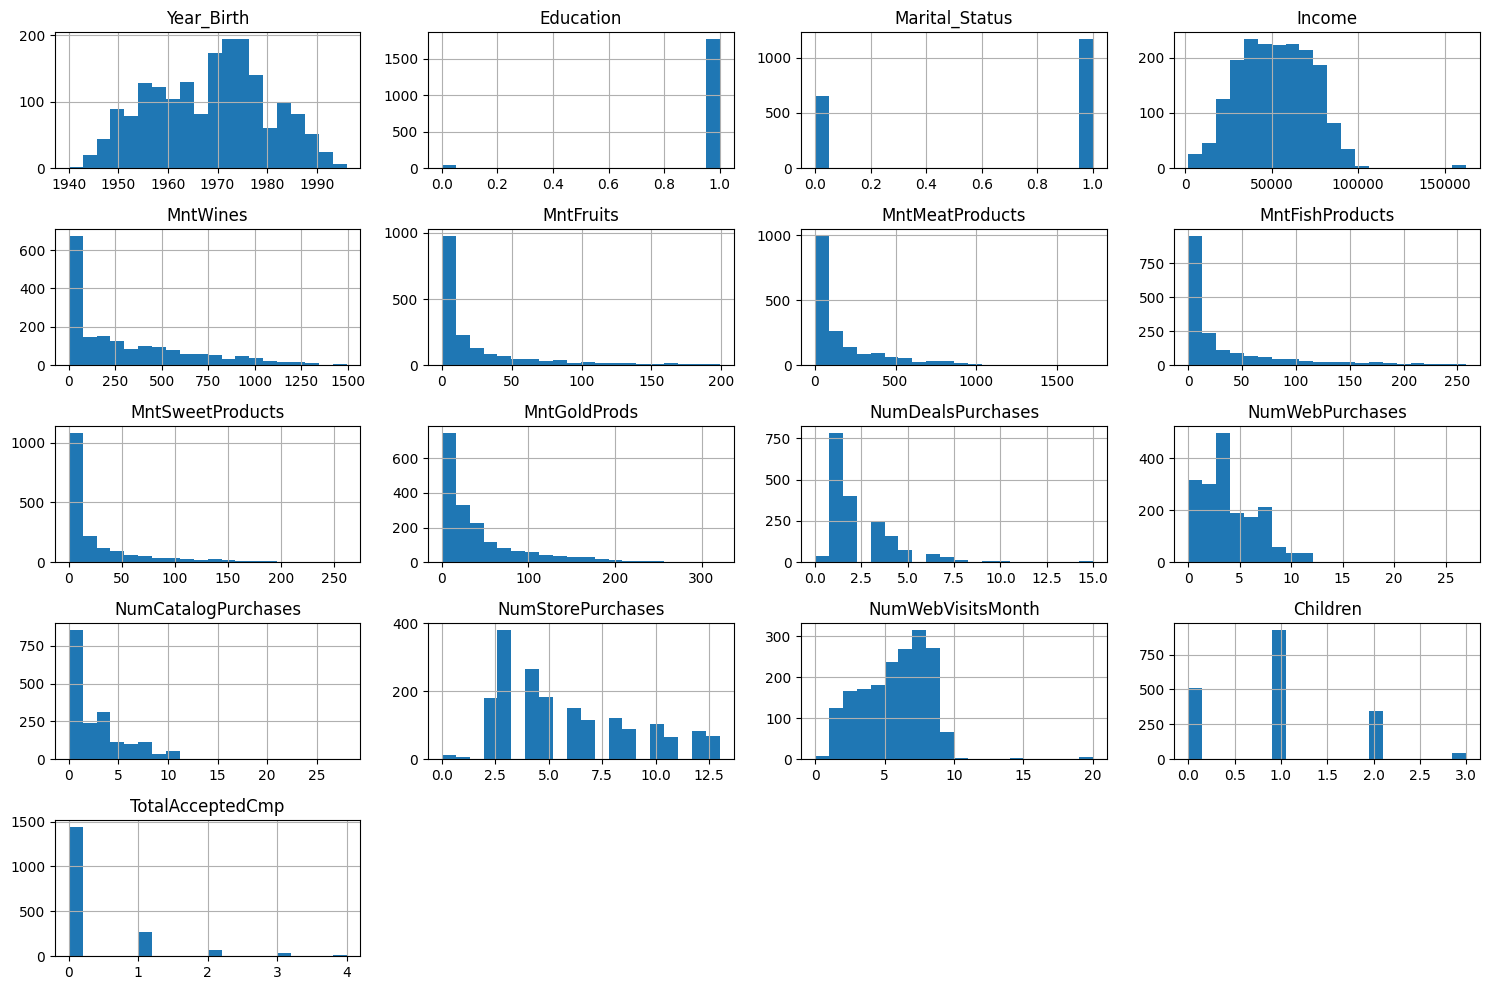

In [155]:
# Plot distributions of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

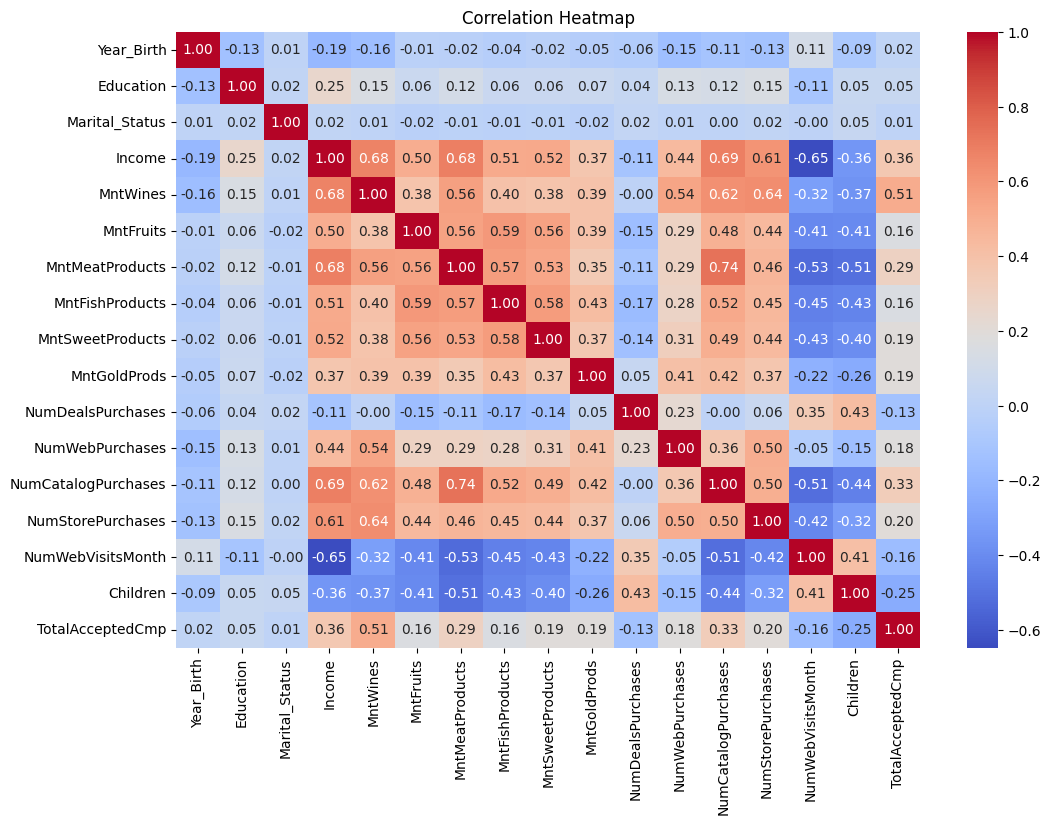

In [156]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Unsuppervised Modeling

In [157]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

### Apply PCA to scaled data

In [158]:
# Apply PCA with all components
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Display explained variance and cumulative variance
for i, (evr, cv) in enumerate(zip(explained_variance_ratio, cumulative_variance), 1):
    print(f"Principal Component {i}: Explained Variance = {evr:.4f}, Cumulative Variance = {cv:.4f}")

Principal Component 1: Explained Variance = 0.3677, Cumulative Variance = 0.3677
Principal Component 2: Explained Variance = 0.1045, Cumulative Variance = 0.4723
Principal Component 3: Explained Variance = 0.0696, Cumulative Variance = 0.5419
Principal Component 4: Explained Variance = 0.0655, Cumulative Variance = 0.6075
Principal Component 5: Explained Variance = 0.0590, Cumulative Variance = 0.6664
Principal Component 6: Explained Variance = 0.0513, Cumulative Variance = 0.7178
Principal Component 7: Explained Variance = 0.0448, Cumulative Variance = 0.7626
Principal Component 8: Explained Variance = 0.0393, Cumulative Variance = 0.8018
Principal Component 9: Explained Variance = 0.0352, Cumulative Variance = 0.8370
Principal Component 10: Explained Variance = 0.0327, Cumulative Variance = 0.8697
Principal Component 11: Explained Variance = 0.0266, Cumulative Variance = 0.8964
Principal Component 12: Explained Variance = 0.0245, Cumulative Variance = 0.9208
Principal Component 13: E

In [159]:
# Find the number of components to explain 90% of the variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain for 95% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the reduced data
print(pca_df.head())

Number of components to retain for 95% variance: 12
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.711080  0.266227  1.329842 -1.353038  1.314457  0.170927 -0.144921   
1 -2.348474 -0.143627 -1.410541 -0.742371  1.482729  0.372218  0.386792   
2  1.875066 -0.070527 -0.139948 -0.520546 -0.634604  0.468504 -1.126120   
3 -2.350207 -0.915921  0.253994  0.169082 -0.955281 -0.884539 -0.056691   
4 -0.139387  0.504651  0.648843 -0.471870 -1.088177 -0.843610  0.893717   

        PC8       PC9      PC10      PC11      PC12  
0  1.207069 -0.610492  2.498160  0.355056  0.191594  
1  0.828966 -0.283474 -0.440060  0.060105  0.295269  
2 -1.628047  0.132591  0.193654 -0.492643 -0.116726  
3 -0.430931  0.128278  0.002937 -0.088045 -0.258504  
4 -0.415090 -0.221385  0.048104 -0.127011  0.064756  


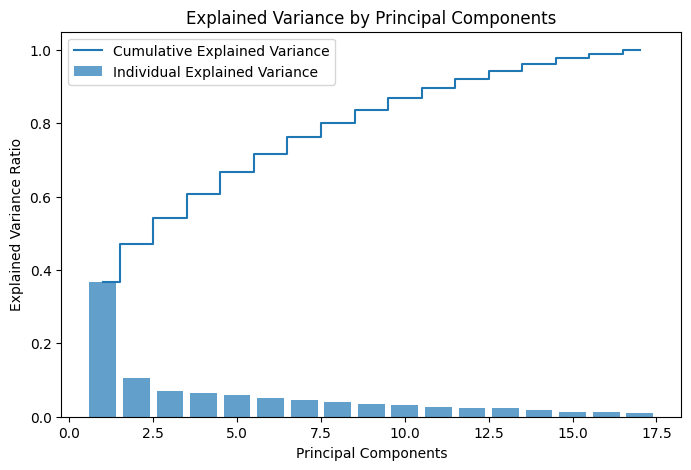

In [160]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

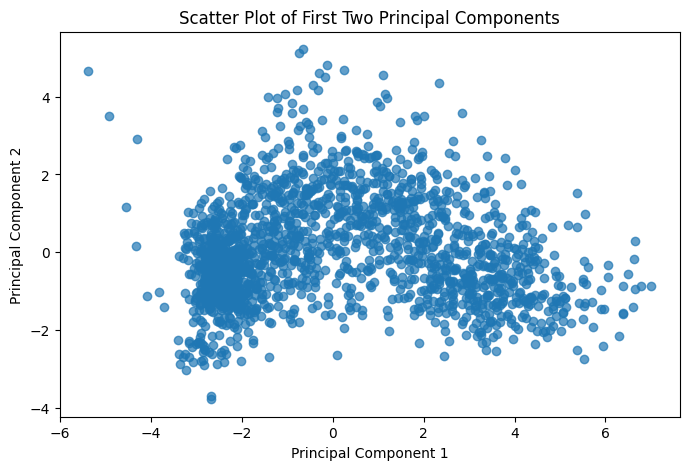

In [161]:
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

### Kmeans


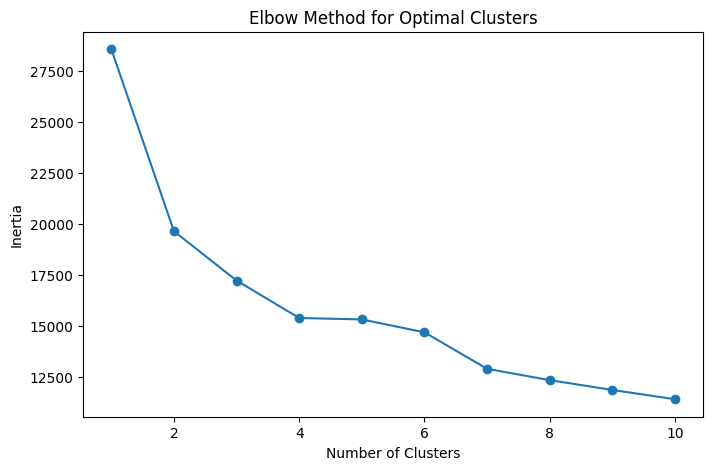

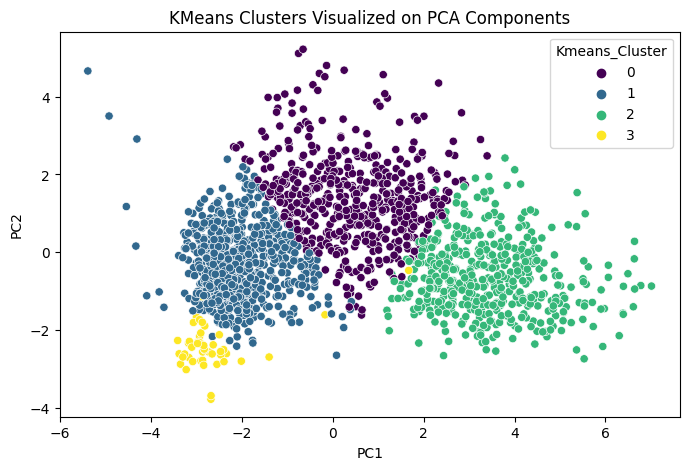

Kmeans Silhouette Score: 0.2489910132172435


In [163]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=3,random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=4, n_init=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the PCA DataFrame
pca_df['Kmeans_Cluster'] = clusters

#visualize clusters
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Kmeans_Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clusters Visualized on PCA Components')
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, clusters)
print(f'Kmeans Silhouette Score: {silhouette_avg}')

### GaussianMixture

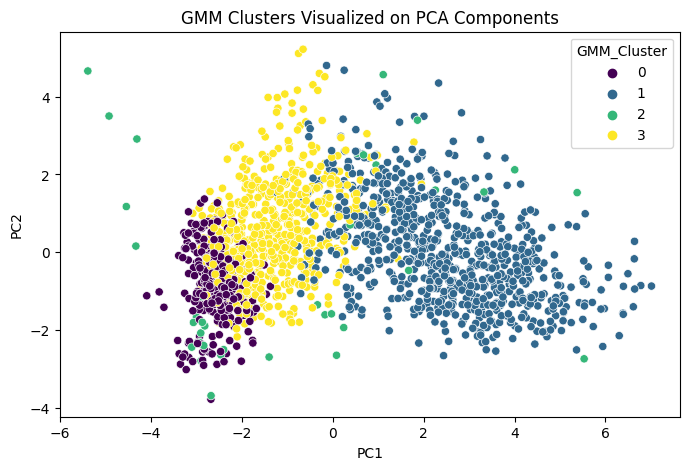

GaussianMixture Silhouette Score: 0.08408710473896387


In [164]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(pca_data)

# Add cluster labels to the PCA DataFrame
pca_df['GMM_Cluster'] = gmm_clusters

# Visualize GMM clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='GMM_Cluster', data=pca_df, palette='viridis')
plt.title('GMM Clusters Visualized on PCA Components')
plt.show()

silhouette_avg = silhouette_score(pca_data, gmm_clusters)
print(f'GaussianMixture Silhouette Score: {silhouette_avg}')

## AgglomerativeClustering

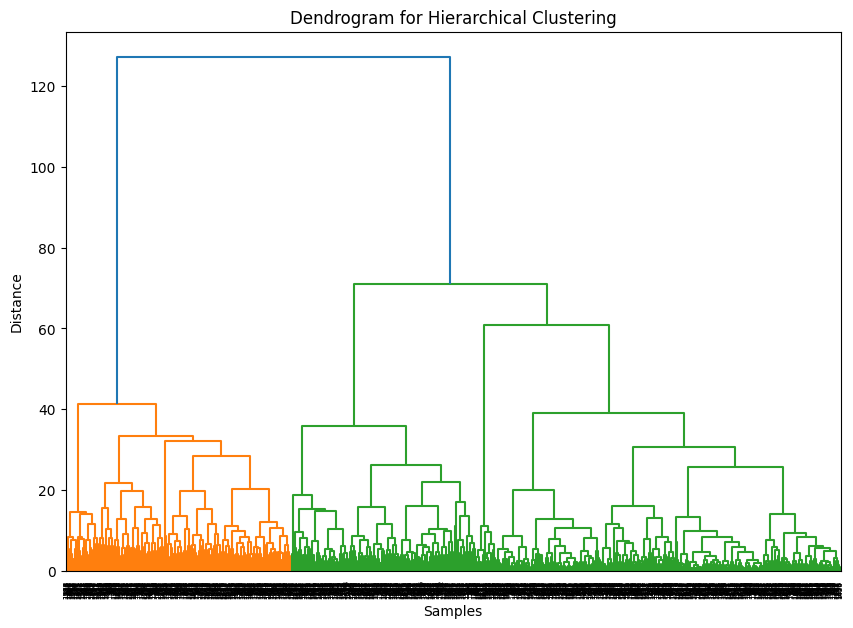

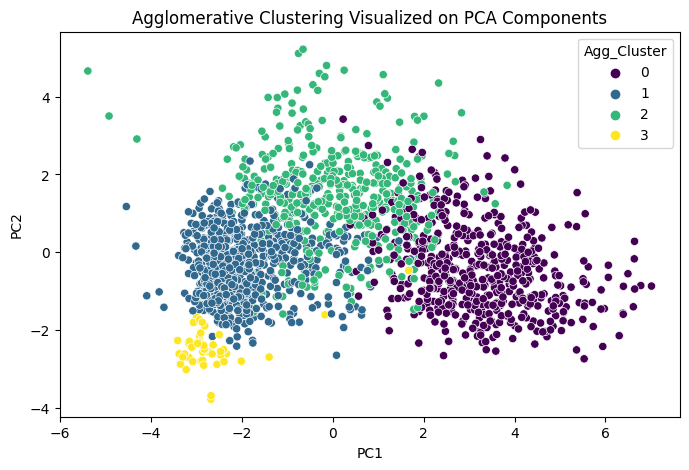

AgglomerativeClustering Silhouette Score: 0.22266569233751274


In [167]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
linkage_matrix = linkage(pca_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_clustering.fit_predict(pca_data)

# Add cluster labels to the PCA DataFrame
pca_df['Agg_Cluster'] = agg_clusters

# Visualize Agglomerative Clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Cluster', data=pca_df, palette='viridis')
plt.title('Agglomerative Clustering Visualized on PCA Components')
plt.show()

silhouette_avg = silhouette_score(pca_data, agg_clusters)
print(f'AgglomerativeClustering Silhouette Score: {silhouette_avg}')

## Model Analysis 

We run 3 unsuppervised models and we get the following results:


- Based on the elbow method, 3 clusters or grups are identified.
- Scores:
    - Kmeans Silhouette Score: 0.2489
    - GaussianMixture Silhouette Score: 0.0840 
    - AgglomerativeClustering Silhouette Score: 0.2226

- KMeans achieves the highest silhouette score, indicating the best cluster separation and cohesion among the three models. Optimizes for compact, spherical clusters, which often matches the structure of data after PCA or when clusters are well-separated.
- Agglomerative Clustering comes second, showing reasonable but slightly less distinct clusters compared to KMeans. Can capture more complex cluster shapes, but may be more sensitive to noise or outliers
- Gaussian Mixture yields the lowest score, suggesting that the clusters it found are less well-defined or that the data may not fit the Gaussian assumptions well. Assume clusters are Gaussian-distributed, which may not fit your data’s true distribution, especially after PCA or with non-Gaussian clusters

- Silhouette Scores: All scores are positive (which is good), but below 0.3, indicating moderate clustering structure. This suggests some overlap between clusters or that the data is not strongly clustered.

### Group analysis

In [168]:
df_with_groups = df.merge(pca_df[['Kmeans_Cluster']], right_index=True,left_index=True)

In [169]:
df_with_groups[df_with_groups['Kmeans_Cluster'] == 0].describe()

,Year_Birth,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,TotalAcceptedCmp,Kmeans_Cluster
count,509.000000,509.0,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.0
mean,1965.011788,1.0,0.654224,58496.123772,484.119843,21.630648,143.538310,28.396857,22.245580,59.707269,3.732809,6.453831,3.151277,7.842829,5.724951,1.151277,0.290766,0.0
std,10.052806,0.0,0.476089,10876.074724,292.428051,25.408108,97.612468,31.571686,27.372694,54.033006,2.251711,2.491784,1.942759,2.656676,1.839790,0.597488,0.590220,0.0
min,1943.000000,1.0,0.000000,4428.000000,16.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1956.000000,1.0,0.000000,52034.000000,262.000000,5.000000,72.000000,6.000000,4.000000,21.000000,2.000000,5.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.0
50%,1965.000000,1.0,1.000000,58512.000000,415.000000,12.000000,123.000000,16.000000,13.000000,42.000000,3.000000,6.000000,3.000000,8.000000,6.000000,1.000000,0.000000,0.0
75%,1973.000000,1.0,1.000000,65526.000000,642.000000,30.000000,186.000000,42.000000,30.000000,82.000000,5.000000,8.000000,4.000000,10.000000,7.000000,1.000000,0.000000,0.0
max,1992.000000,1.0,1.000000,93404.000000,1462.000000,142.000000,650.000000,175.000000,157.000000,321.000000,13.000000,25.000000,11.000000,13.000000,9.000000,3.000000,4.000000,0.0


In [170]:
df_with_groups[df_with_groups['Kmeans_Cluster'] == 1].describe()

,Year_Birth,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,TotalAcceptedCmp,Kmeans_Cluster
count,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0
mean,1970.275000,1.0,0.645000,36636.521250,50.367500,4.320000,24.265000,6.31500,4.377500,14.835000,2.072500,2.201250,0.582500,3.281250,6.396250,1.277500,0.088750,1.0
std,10.963216,0.0,0.478813,14621.543238,57.806461,6.940664,23.831538,10.78813,6.512719,19.846729,1.456845,1.352973,0.764149,1.165696,2.130707,0.691803,0.293225,0.0
min,1940.000000,1.0,0.000000,1730.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1963.000000,1.0,0.000000,28329.000000,10.000000,0.000000,8.000000,0.00000,0.000000,3.000000,1.000000,1.000000,0.000000,3.000000,5.000000,1.000000,0.000000,1.0
50%,1971.000000,1.0,1.000000,36140.500000,26.000000,2.000000,16.000000,3.00000,2.000000,9.000000,2.000000,2.000000,0.000000,3.000000,7.000000,1.000000,0.000000,1.0
75%,1978.000000,1.0,1.000000,44172.500000,69.000000,5.000000,31.000000,8.00000,5.250000,20.000000,3.000000,3.000000,1.000000,4.000000,8.000000,2.000000,0.000000,1.0
max,1995.000000,1.0,1.000000,162397.000000,308.000000,65.000000,137.000000,150.00000,48.000000,262.000000,15.000000,9.000000,5.000000,9.000000,20.000000,3.000000,2.000000,1.0


In [171]:
df_with_groups[df_with_groups['Kmeans_Cluster'] == 2].describe()

,Year_Birth,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,TotalAcceptedCmp,Kmeans_Cluster
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.0
mean,1968.008565,1.0,0.623126,76609.779443,616.597430,69.730193,470.633833,99.511777,70.344754,76.197002,1.289079,5.156317,6.079229,8.246253,2.775161,0.214133,0.708779,2.0
std,13.061095,0.0,0.485123,12100.468585,323.297018,51.325896,253.271379,66.116633,52.228359,59.404518,1.334564,2.410452,3.029210,2.954839,1.724223,0.426048,1.032096,0.0
min,1941.000000,1.0,0.000000,2447.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1957.000000,1.0,0.000000,70144.000000,367.000000,27.500000,276.000000,43.000000,29.500000,30.000000,1.000000,4.000000,4.000000,6.000000,1.000000,0.000000,0.000000,2.0
50%,1969.000000,1.0,1.000000,76542.000000,562.000000,57.000000,431.000000,89.000000,56.000000,56.000000,1.000000,5.000000,6.000000,8.000000,2.000000,0.000000,0.000000,2.0
75%,1978.000000,1.0,1.000000,82197.000000,835.500000,105.500000,619.500000,150.000000,104.000000,111.000000,1.000000,6.000000,8.000000,11.000000,4.000000,0.000000,1.000000,2.0
max,1995.000000,1.0,1.000000,160803.000000,1493.000000,199.000000,1725.000000,258.000000,262.000000,249.000000,15.000000,27.000000,28.000000,13.000000,9.000000,2.000000,4.000000,2.0


In [172]:
df_with_groups[df_with_groups['Kmeans_Cluster'] == 3].describe()

,Year_Birth,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,TotalAcceptedCmp,Kmeans_Cluster
count,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,1977.816327,0.0,0.591837,19913.346939,7.795918,11.204082,11.816327,17.734694,12.612245,22.755102,1.857143,1.918367,0.489796,2.877551,6.918367,0.734694,0.102041,3.0
std,11.698777,0.0,0.496587,6365.638062,32.270975,18.501103,19.716399,33.933621,20.626456,25.320060,1.172604,1.578986,0.680761,0.992317,1.483756,0.531331,0.305839,0.0
min,1947.000000,0.0,0.000000,7500.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,3.0
25%,1973.000000,0.0,0.000000,15056.000000,1.000000,3.000000,3.000000,4.000000,3.000000,9.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000,3.0
50%,1979.000000,0.0,1.000000,20194.000000,2.000000,7.000000,7.000000,10.000000,7.000000,15.000000,1.000000,2.000000,0.000000,3.000000,7.000000,1.000000,0.000000,3.0
75%,1987.000000,0.0,1.000000,24882.000000,5.000000,11.000000,12.000000,16.000000,14.000000,27.000000,2.000000,2.000000,1.000000,3.000000,8.000000,1.000000,0.000000,3.0
max,1996.000000,0.0,1.000000,34445.000000,228.000000,122.000000,122.000000,208.000000,129.000000,144.000000,6.000000,11.000000,2.000000,8.000000,9.000000,2.000000,1.000000,3.0


### Statistics

- Number of records:
    - Group 0: 509
    - Group 1: 800
    - Group 2: 467
    - Group 3: 49
- Education:
    - Group 0: With higher education (~22%)
    - Group 1: Without higher education (~100%)
    - Group 2: Without higher education (~100%)
    - Group 3: Without higher education (~100%)
- Marital Status:
    - Group 0: With a partner (~65%)
    - Group 1: With a partner (~64%)
    - Group 2: With a partner (~62%)
    - Group 3: With a partner (~59%)
- Income:
    - Group 0: Average 58496
    - Group 1: Average 36636
    - Group 2: Average 76609
    - Group 3: Average 19913
- Children
    - Group 0: Average 1.15
    - Group 1: Average 1.27
    - Group 2: Average 0.21
    - Group 3: Average 0.73
- Purchases:
    - Group 0: Average they do store purchases 7.84 times, web purchases 6.45 times and catalog purchases 3.15 times
    - Group 1: Average they do store purchases 3.28 times and catalog purchases 0.58 times
    - Group 2: Average they do store purchases 8.24 times and deals purchases 1.28 times
    - Group 3: Average they do store purchases 2.87 times and catalog purchases 0.48 times

- Amount spend in wine:
    - Group 0: Average 6.45
    - Group 1: Average 50.36
    - Group 2: Average 616.59
    - Group 3: Average 7.79

- Amount spend in fruits:
    - Group 0: Average 21.63
    - Group 1: Average 4.32
    - Group 2: Average 69.73
    - Group 3: Average 11.20

- Amount spend in meat:
    - Group 0: Average 143.53
    - Group 1: Average 24.26
    - Group 2: Average 470.63
    - Group 3: Average 11.81

- Amount spend in fish:
    - Group 0: Average 28.39
    - Group 1: Average 6.31
    - Group 2: Average 99.51
    - Group 3: Average 17.73

- Amount spend in sweet products:
    - Group 0: Average 22.24
    - Group 1: Average 4.37
    - Group 2: Average 70.34
    - Group 3: Average 12.61
      
- Amount spend in gold products:
    - Group 0: Average 59.70
    - Group 1: Average 14.83
    - Group 2: Average 76.19
    - Group 3: Average 22.75

### Customer Profiles

- Group 0: **Moderate Earners with Higher Education Presence**
    - Largest group with moderate income (~$58k).
    - About 22% have higher education.
    - Majority have partners and around 1 child on average.
    - Active buyers across store, web, and catalog channels.
    - Moderate spending across all product categories, especially meat and gold products.

- Group 1: **Lower Income, Without Higher Education**
    - Largest group by count (800), but lowest average income (~$36k).
    - 100% without higher education.
    - Similar partner rate to group 0.
    - Lower purchase frequency, mainly store and catalog.
    - Spend heavily on wine compared to other groups, but low on other categories.

- Group 2: **High Income, Without Higher Education, Low Children**
    - High average income (~$76k), but no higher education.
    - Lowest average children count (0.21).
    - Highest store purchase frequency and deals purchases.
    - Extremely high spending on wine, meat, fruits, sweets, and gold products - the "premium buyers" group.

- Group 3: **Smallest Group, Low Income**
    - Smallest group (49 records), lowest income (~$20k).
    - No higher education.
    - Slightly fewer with partners.
    - Lowest purchase frequency and spending across all categories.
    - Possibly a low-engagement or budget-conscious segment.

### Summary
- Group 2 stands out as high-income, premium buyers with heavy spending and purchase frequency.
- Group 1 and Group 3 are lower income, less engaged buyers with minimal education.
- Group 0 is a balanced middle segment with moderate income, some higher education, and diverse purchasing habits.

### Marketing strategies should be tailored accordingly:
- Group 2: Premium product promotions and loyalty programs.
- Group 1 & 3: Value deals, discounts, and education-focused campaigns.
- Group 0: Mixed approach, highlighting variety and convenience.